<a href="https://colab.research.google.com/github/C-Oluwashola/mllab/blob/main/Predicting_house_prices_using_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


For XGBOOST

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
import pandas as pd


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/msc_training_dataset.csv')
test_data = pd.read_csv('/content/drive/MyDrive/msc_testing_dataset.csv')

In [ ]:
train_data.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [ ]:
train_data.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [ ]:
continuous_var = train_data['price']
discrete_vars = train_data[['room', 'bathroom', 'furnished', 'kitchen', 'french_door', 'backyard', 'green_paint', 'solar_power', 'woodfloor', 'qlm_security', 'club_access']]

In [ ]:
for var in discrete_vars:
    corr, p_value = pointbiserialr(continuous_var, train_data[var])
    print(f'Point-biserial correlation coefficient for {var}: {corr:.2f}, p-value: {p_value:.4f}')

Point-biserial correlation coefficient for room: 0.65, p-value: 0.0000
Point-biserial correlation coefficient for bathroom: 0.06, p-value: 0.0006
Point-biserial correlation coefficient for furnished: 0.45, p-value: 0.0000
Point-biserial correlation coefficient for kitchen: 0.12, p-value: 0.0000
Point-biserial correlation coefficient for french_door: 0.09, p-value: 0.0000
Point-biserial correlation coefficient for backyard: 0.13, p-value: 0.0000
Point-biserial correlation coefficient for green_paint: 0.08, p-value: 0.0000
Point-biserial correlation coefficient for solar_power: 0.32, p-value: 0.0000
Point-biserial correlation coefficient for woodfloor: 0.43, p-value: 0.0000
Point-biserial correlation coefficient for qlm_security: 0.08, p-value: 0.0000
Point-biserial correlation coefficient for club_access: 0.17, p-value: 0.0000


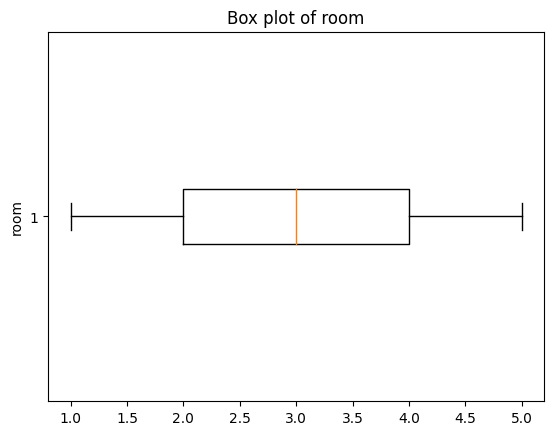

count    3000.000000
mean        2.990000
std         1.424281
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: room, dtype: float64 



In [ ]:
plt.boxplot(train_data['room'], vert=False)
plt.title('Box plot of room')
plt.ylabel('room')
plt.show()
print(train_data.room.describe(),'\n')

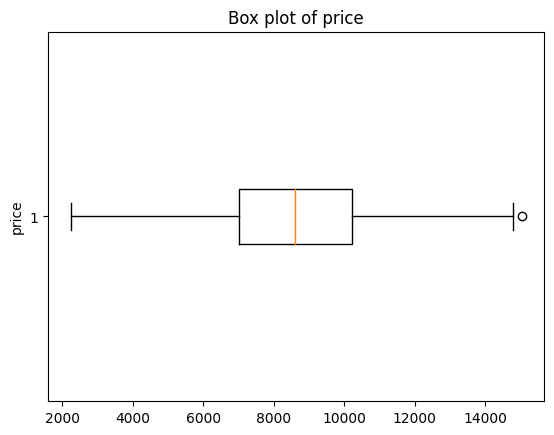

count     3000.000000
mean      8606.600000
std       2216.248563
min       2235.000000
25%       7005.000000
50%       8615.000000
75%      10215.000000
max      15035.000000
Name: price, dtype: float64 



In [ ]:
plt.boxplot(train_data['price'], vert=False)
plt.title('Box plot of price')
plt.ylabel('price')
plt.show()
print(train_data.price.describe(),'\n')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


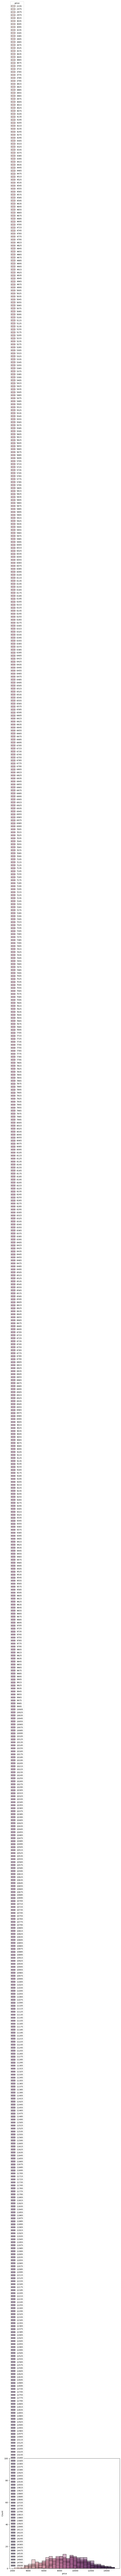

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.histplot(x='price', hue='price', data=train_data, kde=True)
ax.set_ylim([0, 100])
plt.show()

In [ ]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data.iloc[:, :-1])

In [ ]:
model = XGBRegressor(max_depth=5, learning_rate=0.05, n_estimators=1000)

model.fit(X_train_scaled, y_train, eval_set=[(X_train_scaled, y_train)], eval_metric='rmse', early_stopping_rounds=10)

[0]	validation_0-rmse:8449.22531
[1]	validation_0-rmse:8033.53508
[2]	validation_0-rmse:7638.55783
[3]	validation_0-rmse:7263.31512
[4]	validation_0-rmse:6906.72128
[5]	validation_0-rmse:6568.01482
[6]	validation_0-rmse:6246.15754
[7]	validation_0-rmse:5940.47920
[8]	validation_0-rmse:5650.01291
[9]	validation_0-rmse:5374.17108
[10]	validation_0-rmse:5112.14526
[11]	validation_0-rmse:4863.23917
[12]	validation_0-rmse:4626.87559
[13]	validation_0-rmse:4402.29678
[14]	validation_0-rmse:4189.10534
[15]	validation_0-rmse:3986.52550
[16]	validation_0-rmse:3794.25895
[17]	validation_0-rmse:3611.52876
[18]	validation_0-rmse:3438.05294
[19]	validation_0-rmse:3273.33865
[20]	validation_0-rmse:3117.01655
[21]	validation_0-rmse:2968.38537
[22]	validation_0-rmse:2827.36495


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:2693.34359
[24]	validation_0-rmse:2566.19337
[25]	validation_0-rmse:2445.25961
[26]	validation_0-rmse:2330.61440
[27]	validation_0-rmse:2221.47101
[28]	validation_0-rmse:2118.07156
[29]	validation_0-rmse:2019.67585
[30]	validation_0-rmse:1926.40774
[31]	validation_0-rmse:1837.62624
[32]	validation_0-rmse:1753.49988
[33]	validation_0-rmse:1673.45670
[34]	validation_0-rmse:1597.46051
[35]	validation_0-rmse:1525.20941
[36]	validation_0-rmse:1456.79264
[37]	validation_0-rmse:1391.73592
[38]	validation_0-rmse:1329.86611
[39]	validation_0-rmse:1271.25267
[40]	validation_0-rmse:1215.29833
[41]	validation_0-rmse:1162.23556
[42]	validation_0-rmse:1111.80927
[43]	validation_0-rmse:1064.09777
[44]	validation_0-rmse:1018.56702
[45]	validation_0-rmse:975.62843
[46]	validation_0-rmse:934.38828
[47]	validation_0-rmse:895.25729
[48]	validation_0-rmse:858.25307
[49]	validation_0-rmse:822.91135
[50]	validation_0-rmse:789.52760
[51]	validation_0-rmse:757.68044
[52]	validation_0-rms

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
print(y_pred)

[ 5066.394   7639.859  11283.546   8898.251  11122.792  11364.446
 11773.307   6869.315   7803.089   5833.4653  9125.191   8326.597
  6689.0376 11273.901   7225.6553  9151.426   8751.705  12759.346
  9723.197   6679.1636  9393.021   7769.058   7067.542   4282.4897
  9980.216   6932.176   7327.22    8917.166   6331.0635  9731.718
  6643.4224 10293.847  10503.377   8177.074   7628.134  10372.821
  9498.201  11108.563   9707.437  12856.23    6354.6836  5121.4795
  9855.077   8879.071  11715.825   6169.008   4089.7776 11418.425
  9591.415   5577.063  11404.639  10418.836   4264.965   7684.83
 13020.082   9638.363   6464.6313  8391.543  10174.415   7860.327
  8249.519  14221.239   7027.311   8441.401  12605.151   7036.121
 11498.753  10541.36   10054.824   5517.4595  8238.281  12059.047
  4185.4194  5994.784   9363.9375  9195.337   7063.079  11511.288
 10886.517  10803.048   8791.98    7307.486  11882.195   8335.578
 11797.8955  5945.63    8784.908   8269.911   7157.6978  8292.344
  7591.12

In [ ]:
mse = mean_squared_error(test_data.iloc[:, -1], y_pred)
mae = mean_absolute_error(test_data.iloc[:, -1], y_pred)
r2 = r2_score(test_data.iloc[:, -1], y_pred)
f1 = f1_score(test_data.iloc[:, -1] > 7000, y_pred > 7000, average='binary')

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("F1-score:", f1)

Mean Squared Error: 2190.353411054766
Mean Absolute Error: 34.598706372388015
R-squared: 0.9995542763167005
F1-score: 0.9986772486772486


In [ ]:
importances = model.feature_importances_
for i, col in enumerate(X_train.columns):
    print(f"{col}: {importances[i]:.3f}")

room: 0.268
bathroom: 0.017
kitchen: 0.020
french_door: 0.011
backyard: 0.021
furnished: 0.262
green_paint: 0.019
solar_power: 0.110
woodfloor: 0.226
qlm_security: 0.014
club_access: 0.032


In [ ]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)
pos = np.arange(sorted_idx.shape[0]) + .5

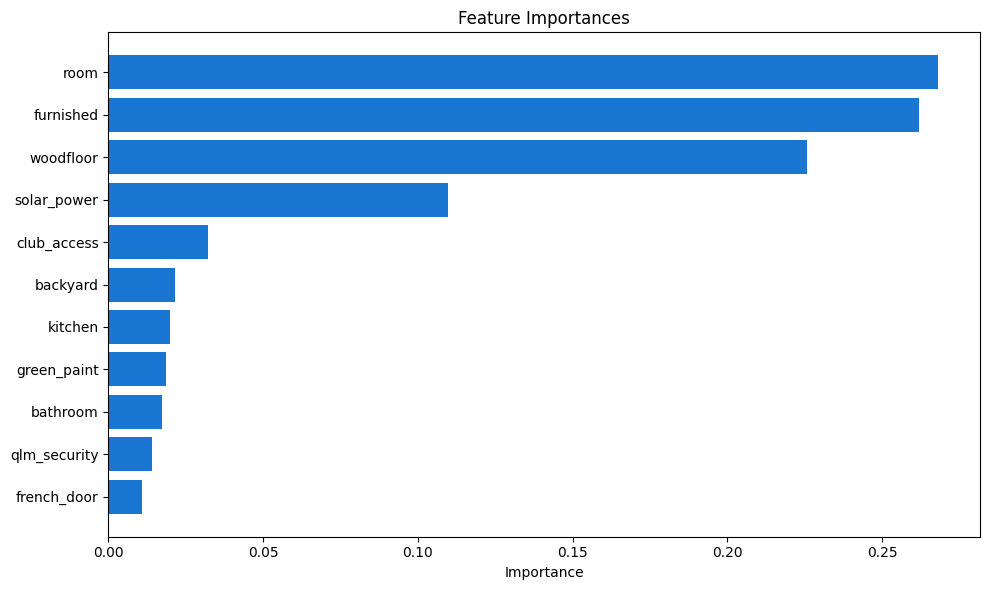

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(pos, importances[sorted_idx], align='center', color='#1976D2')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()